# Bibliotecas



In [ ]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 54.3 MB/s eta 0:00:00


# Base de Dados

In [ ]:
base_credit = pd.read_csv('/content/credit_data.csv')

#Análise Exploratória

In [ ]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
base_credit.describe()


,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000




*   Será que a pessoa com maior dívida pagou-a?



In [ ]:
base_credit[base_credit['loan'] >= 13766.051239]

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0


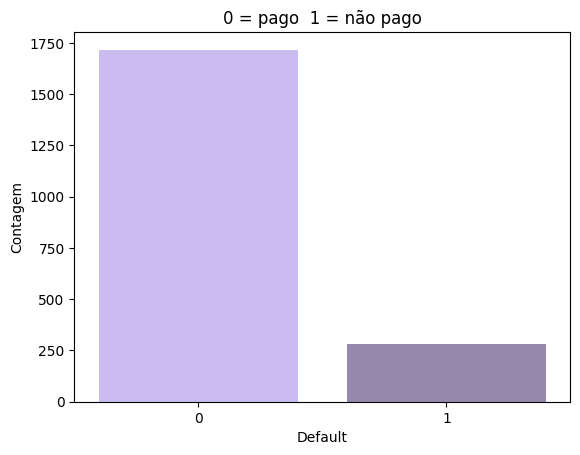

In [ ]:
paleta = ["#C6B3FA", "#9583B3"]

sns.countplot(x=base_credit['default'], palette=paleta)

plt.title("0 = pago  1 = não pago")
plt.xlabel("Default")
plt.ylabel("Contagem")

plt.show()

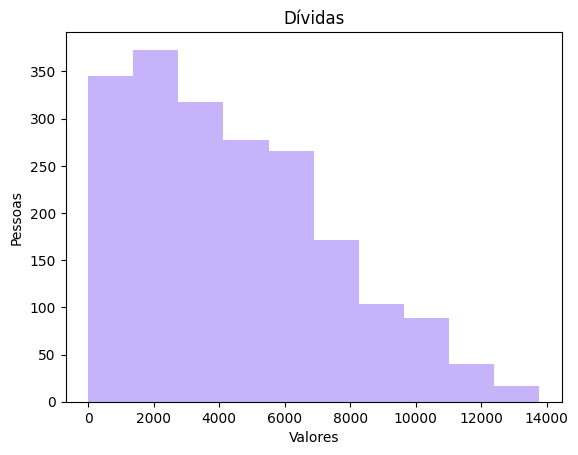

In [ ]:
plt.hist(x=base_credit['loan'], color='#C6B3FA')

plt.title('Dívidas')
plt.xlabel('Valores')
plt.ylabel('Pessoas')

plt.show()

In [66]:
graf = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
graf.show()


#Preparação dos Dados



*   Alguns dados possuem erros!



In [ ]:
base_credit.loc[base_credit['age'] < 0]
#existem tres clientes com idades negativas

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()
#obtemos a média das idades sem considerar os dados faltantes

40.92770044906149

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92
#preenchemos as idades faltantes com a média das idades





*   Verificação do tratamento



In [ ]:
base_credit.head(31)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0




* Também existem atributos sem registro!



In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]
#mostra os registros quem possuem o valor nulo

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)




*   Verificação do tratamento



In [ ]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0




*   Previsores e Classe



In [ ]:
X_credit = base_credit.iloc[:, 1:4].values #mudar
#iloc seleciona linhas e colunas do dataframe. todas as linhas e da coluna 1(income, ate loan, obs: o id do cliente nao importa)

In [ ]:
y_credit = base_credit.iloc[:, 4].values
#a classe é o default



*   Escalonamento (deixar todos na mesma escala para o algoritmo nao achar que um é mais importante que outro)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)
#se encaixa nos dados e faz a transformação



*   Divisão em treinamento e teste


In [ ]:
from sklearn.model_selection import train_test_split
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)
#passa a base de dados completa com os 3000 registros e define 25% pra teste e 75% para treinamento




*   Salvar bases


In [ ]:
#para que nao seja preciso executar o pre processamento outra vez
import pickle
with open('salvo.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)
  #salva nos arquivos do programa um novo arquivo com o nome que colocamos

#Árvores de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
with open('salvo.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)
#treina com 1500 registros e 3 colunas

In [ ]:
#cria árvore
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste
#comparação com os dados reais que ja estao na base de dados

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#calculando acuracia
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

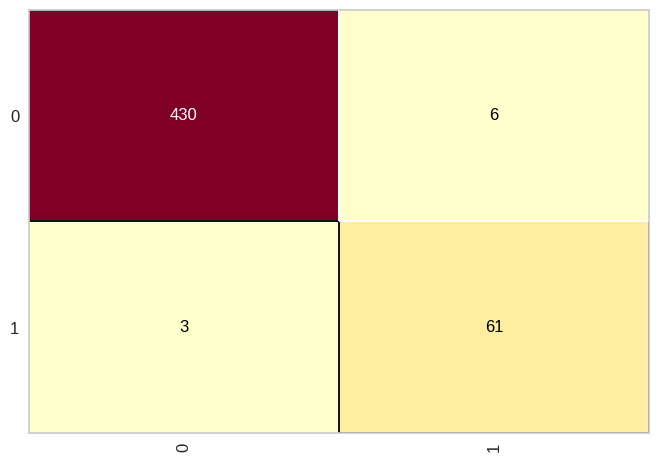

In [ ]:
#gerando matriz de confusao
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)

#calculo do score(da o mesmo resultado da acuracia)
cm.score(X_credit_teste, y_credit_teste)

#430 clientes que pagam foram corretamente classificados como pagam
#6 clientes que pagam foram classificados como nao pagam

#61 clientes que nao pagam foram corretamente classificados como nao pagam
#3 que nao pagam foram classificados como pagam

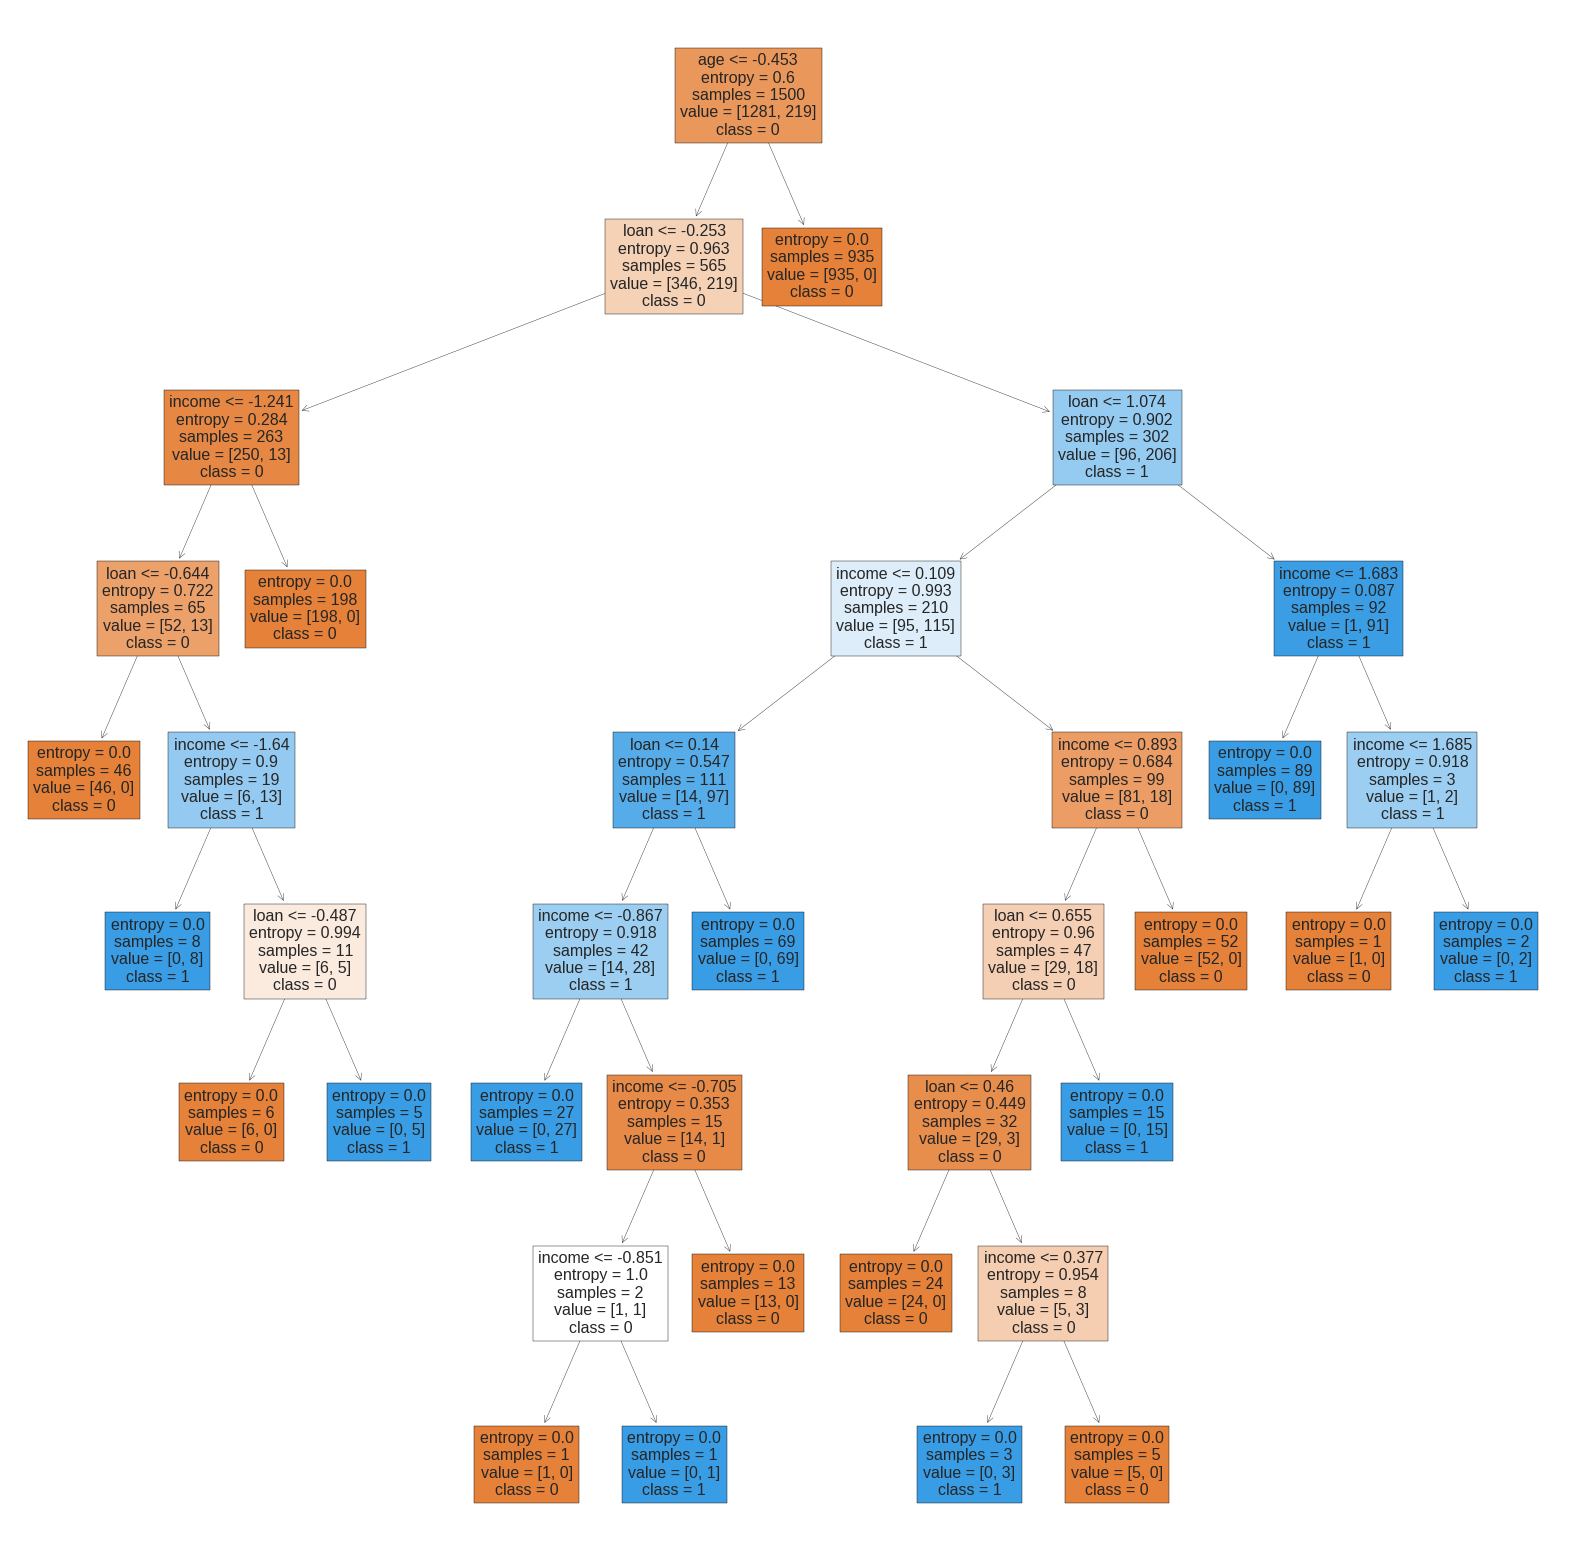

In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

In [ ]:

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

alphas = np.linspace(0, 1, 50)[1:]

scores = []
std_scores = []


for alpha in alphas:

    arvore = DecisionTreeClassifier(ccp_alpha=alpha, random_state=0)

    cv_scores = cross_val_score(arvore, X_credit_treinamento, y_credit_treinamento, cv=5)

    scores.append(np.mean(cv_scores))
    std_scores.append(np.std(cv_scores))

best_alpha = alphas[np.argmax(scores)]

arvore_final = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)
arvore_final.fit(X_credit_treinamento, y_credit_treinamento)

cv_final_scores = cross_val_score(arvore_final, X_credit_treinamento, y_credit_treinamento, cv=5)
mean_cv_final_score = np.mean(cv_final_scores)
std_cv_final_score = np.std(cv_final_scores)

y_pred = arvore_final.predict(X_credit_teste)
accuracy = accuracy_score(y_credit_teste, y_pred)
classification_report = classification_report(y_credit_teste, y_pred)

print("Resultados da Validação Cruzada:")
print("Média do Score:", mean_cv_final_score)
print("Desvio Padrão do Score:", std_cv_final_score)
print("\nDesempenho do Modelo nos Dados de Teste:")
print("Acurácia do modelo:", accuracy)
print("Relatório de classificação:\n", classification_report)



Resultados da Validação Cruzada:
Média do Score: 0.958
Desvio Padrão do Score: 0.013266499161421606

Desempenho do Modelo nos Dados de Teste:
Acurácia do modelo: 0.958
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       436
           1       0.83      0.84      0.84        64

    accuracy                           0.96       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.96      0.96      0.96       500



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
import pickle
with open('salvo.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

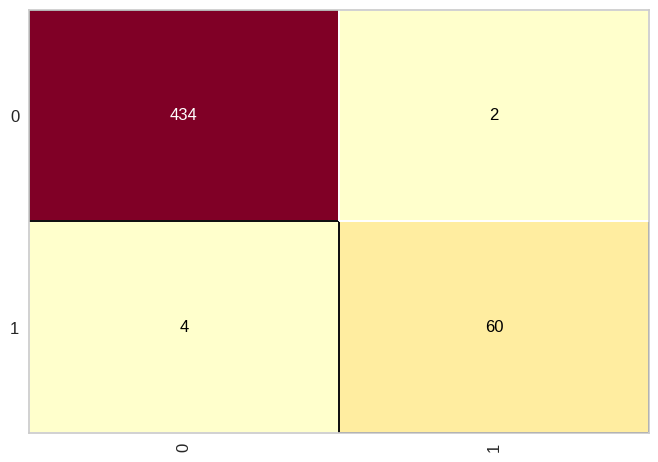

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



# Redes neurais

In [68]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import pickle
with open('salvo.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [59]:
# Create a sequential model
rede_neural_credit = Sequential()

# Add layers to the model
rede_neural_credit.add(Dense(20, activation='relu', input_shape=(3,)))
rede_neural_credit.add(Dense(20, activation='relu'))
rede_neural_credit.add(Dense(1, activation='sigmoid'))

# Compile the model
rede_neural_credit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento, epochs=700, verbose=True,batch_size=32)




Epoch 1/700
47/47 [==============================] - 4s 12ms/step - loss: 0.5378 - accuracy: 0.8373
Epoch 2/700
47/47 [==============================] - 1s 13ms/step - loss: 0.3518 - accuracy: 0.8780
Epoch 3/700
47/47 [==============================] - 0s 9ms/step - loss: 0.2423 - accuracy: 0.9280
Epoch 4/700
47/47 [==============================] - 0s 6ms/step - loss: 0.1839 - accuracy: 0.9407
Epoch 5/700
47/47 [==============================] - 1s 12ms/step - loss: 0.1527 - accuracy: 0.9467
Epoch 6/700
47/47 [==============================] - 1s 11ms/step - loss: 0.1311 - accuracy: 0.9513
Epoch 7/700
47/47 [==============================] - 0s 9ms/step - loss: 0.1152 - accuracy: 0.9580
Epoch 8/700
47/47 [==============================] - 0s 9ms/step - loss: 0.1029 - accuracy: 0.9680
Epoch 9/700
47/47 [==============================] - 0s 8ms/step - loss: 0.0924 - accuracy: 0.9700
Epoch 10/700
47/47 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 0.9733
Epoch

16/16 [==============================] - 0s 3ms/step


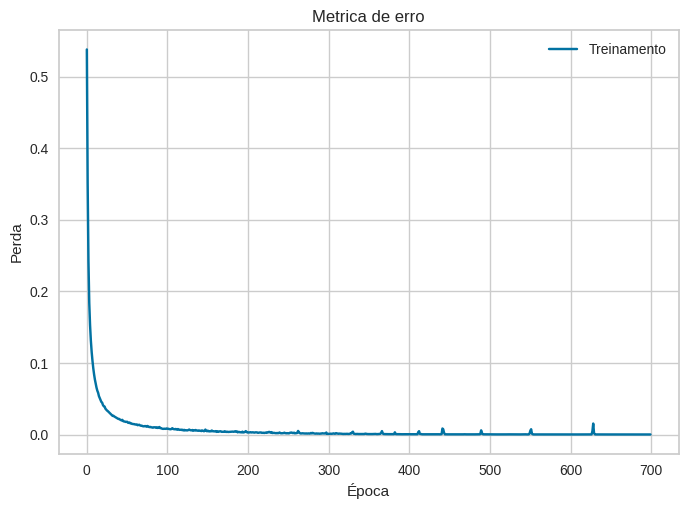

--> Acurácia (treinamento): 1.0000
--> Acurácia (teste): 0.9940
Erro de treinamento (Ein): 0.0000
Erro de teste (Eout): 0.0060
Acurácia: 0.9940
Precisão: 0.9841
Recall: 0.9688
F1-score: 0.9764


In [69]:

prob_treinamento = rede_neural_credit.predict(X_credit_treinamento)
prob_teste = rede_neural_credit.predict(X_credit_teste)

pred_treinamento = np.round(prob_treinamento).flatten()
pred_teste = np.round(prob_teste).flatten()


erro_treinamento = np.mean(pred_treinamento != y_credit_treinamento)
erro_teste = np.mean(pred_teste != y_credit_teste)


plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.show()


accuracy_treinamento = accuracy_score(y_credit_treinamento, pred_treinamento)
accuracy_teste = accuracy_score(y_credit_teste, pred_teste)

print(f'--> Acurácia (treinamento): {accuracy_treinamento:.4f}')
print(f'--> Acurácia (teste): {accuracy_teste:.4f}')
print(f'Erro de treinamento (Ein): {erro_treinamento:.4f}')
print(f'Erro de teste (Eout): {erro_teste:.4f}')


acuracia = accuracy_score(y_credit_teste, pred_teste)
precisao = precision_score(y_credit_teste, pred_teste)
recall = recall_score(y_credit_teste, pred_teste)
f1 = f1_score(y_credit_teste, pred_teste)

print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precisao:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Ao imprimir os valores de Ein e Eout, podemos compará-los. Se o erro de treinamento for significativamente menor que o erro de teste, é um sinal de overfitting. Por outro lado, se os erros forem semelhantes, o modelo pode não estar sofrendo de overfitting.